In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier, plot_tree
from statsmodels.graphics.mosaicplot import mosaic

In [45]:
df = pd.read_csv("statEV.csv")

In [46]:
df.head()

,state,Total Ev,Total non Ev,Average Income(INR),BusinessRanking
0,Andaman & Nicobar Island,162,"1,46,945",218000,22
1,Arunachal Pradesh,20,"2,52,965",192360,29
2,Assam,"64,766","46,77,053",86857,20
3,Bihar,"83,335","1,04,07,078",43605,26
4,Chandigarh,"2,812","7,46,881",292977,29


In [47]:
df.isnull().sum()

state                  0
Total Ev               0
Total non Ev           0
Average Income(INR)    0
BusinessRanking        0
dtype: int64

In [48]:
df["Total Ev"]=df["Total Ev"].apply(lambda x: x.replace(",",""))
df["Total non Ev"]=df["Total non Ev"].apply(lambda x: x.replace(",",""))

In [49]:
df["Total non Ev"] = pd.to_numeric(df['Total non Ev'])
df["Total non Ev"].dtypes

dtype('int64')

In [50]:
df["Total Ev"] = pd.to_numeric(df['Total Ev'], errors='coerce')
df['Total Ev'].dtypes

dtype('int64')

In [51]:
df["EV_percentage"]=df["Total Ev"]/(df["Total non Ev"]+df["Total Ev"])*100

[]

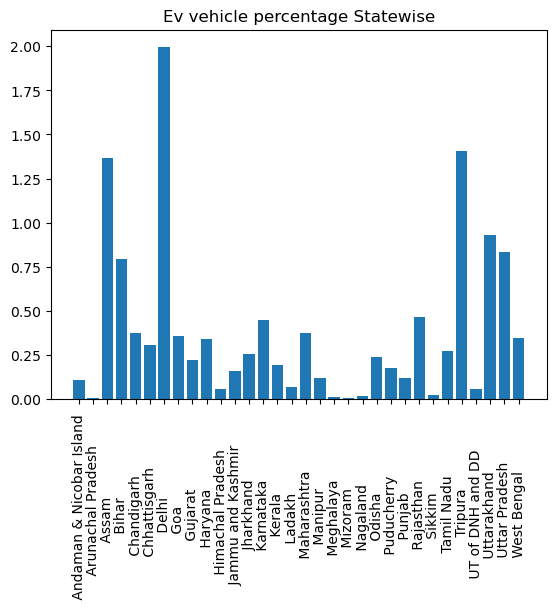

In [52]:
plt.bar(df["state"], df["EV_percentage"])
plt.xticks(rotation='vertical')
plt.title("Ev vehicle percentage Statewise")
plt.savefig('Ev_percentage.png', bbox_inches='tight', pad_inches=0) 
plt.plot()

In [53]:
Topstate= df.sort_values(by='EV_percentage', ascending=False)

In [54]:
Topstate["state"].head()

6      Delhi                    
27     Tripura                  
2      Assam                    
29     Uttarakhand              
30     Uttar Pradesh            
Name: state, dtype: object

In [55]:
## Ev vehicle are mostly at the city : Delhi Tripura Assam Uttrakhand Uttar Pradesh

In [56]:
##Relationship with Evpercentage and bussinessRanking city

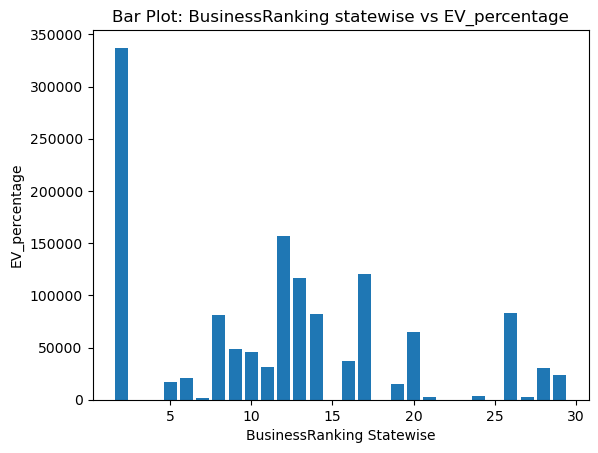

In [57]:
#Bar plot
plt.bar(df['BusinessRanking'],df['Total Ev'] )

plt.xlabel('BusinessRanking Statewise')
plt.ylabel('EV_percentage')
plt.title('Bar Plot: BusinessRanking statewise vs EV_percentage')
plt.savefig('image.png', bbox_inches='tight', pad_inches=0) 
plt.show()

In [58]:
##clearly visible that the city with highest bussiness ranking has more number of ev vehicle

In [59]:
## For targeting the city as part of market segment we cluster state by using feature 
## Kmeans clustering

In [60]:
max_average=df["Average Income(INR)"].max()
df["normalize_Income"] = df["Average Income(INR)"]/abs(max_average)
df["normalize_Income"]= df["normalize_Income"].round(2)

In [61]:
drop_cols=[0,1,2,3,5]
kmeans_df = df.drop(df.columns[drop_cols], axis=1)
K=kmeans_df.drop(kmeans_df.columns[0], axis=1)
kmeans_df.head()
K.head()

,normalize_Income
0,0.51
1,0.45
2,0.20
3,0.10
4,0.68


In [62]:
k1=K.iloc[:5,:]
arr = k1.to_numpy()
arr

array([[0.51],
       [0.45],
       [0.2 ],
       [0.1 ],
       [0.68]])

In [63]:
# wcss = []

# for i in range(2,11):
#     km = KMeans(n_clusters=i)
#     km.fit_predict(values)
#     wcss.append(km.inertia_)

In [64]:
K['normalize_Income'].dtypes

dtype('float64')

[]

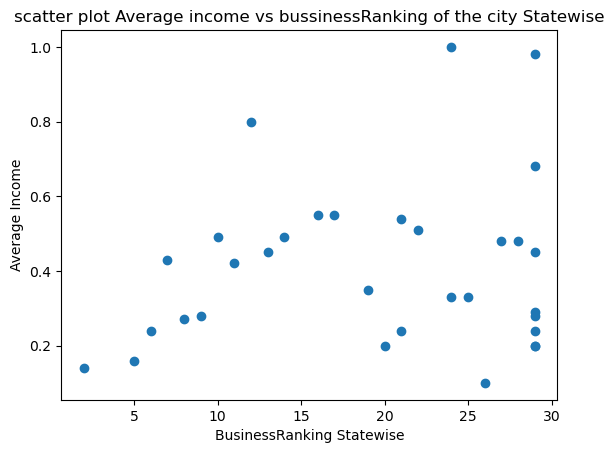

In [65]:
plt.scatter(kmeans_df['BusinessRanking'],kmeans_df["normalize_Income"])
plt.title("scatter plot Average income vs bussinessRanking of the city Statewise")
plt.xlabel("BusinessRanking Statewise")
plt.ylabel("Average Income")
plt.savefig('kmeansclustering.png', bbox_inches='tight', pad_inches=0) 
plt.plot()

In [66]:
X = kmeans_df.to_numpy()

In [67]:
## Hirerchichal clustreing

In [68]:
k=df.iloc[:, 3:5]

In [69]:
kmeans_df.isnull().sum()

BusinessRanking     0
normalize_Income    0
dtype: int64

In [70]:
X=kmeans_df.iloc[:,:].values
km=KMeans(n_clusters=3 )

In [71]:
y_means=km.fit_predict(X)

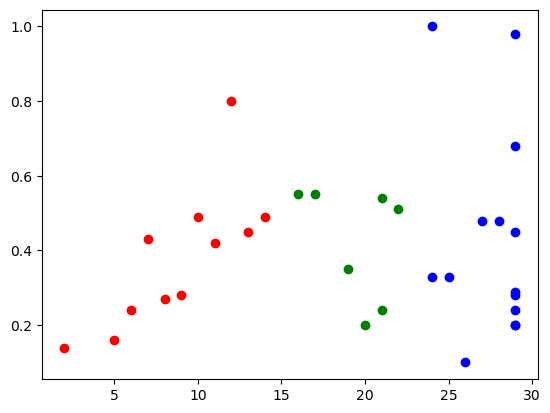

In [72]:

plt.scatter(X[y_means==0,0], X[y_means==0,1], color="blue")
plt.scatter(X[y_means==1,0], X[y_means==1,1], color="red")
plt.scatter(X[y_means==2,0], X[y_means==2,1], color="green")
plt.savefig('kmeansclustering1.png', bbox_inches='tight', pad_inches=0)
# plt.scatter(X[y_means==3,0], X[y_means==3,1], color="yellow")

In [73]:
cols=kmeans_df.columns.values
values=kmeans_df[cols].values

In [74]:
## The city which has bussinessranking 1-14  ,  15- 24,  25-30,   we can apply these three state clustres with same strategy

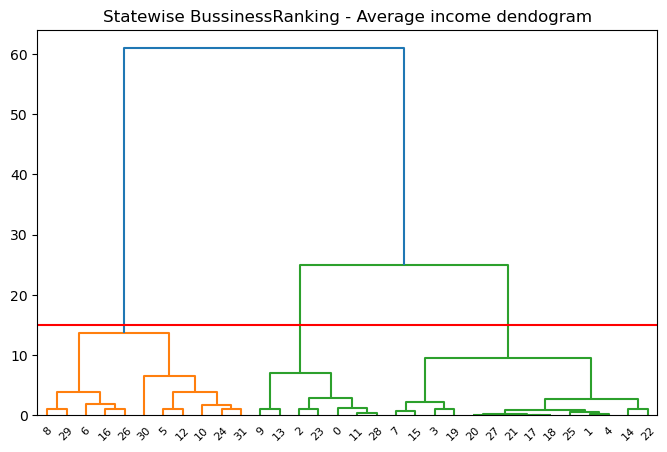

In [75]:
# import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8, 5))
plt.title("Statewise BussinessRanking - Average income dendogram")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 15, color = 'r', linestyle = '-')
plt.savefig('Dendogram.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [76]:
sum(df['BusinessRanking']>25)

11

In [77]:
## Existing tough competitor in the market
data=pd.read_csv('CAR_data_1.csv')

In [78]:
data.head()

,Product,Market type,Body,Production type,Market share(%),Price(lakh),Battery(kWh),Range(km)
0,Tata Nexon Ev,Mass-market,SUV,Local,63.00,15.00,30.2,312
1,Tata Tigor Ev,Mass-market,sedan,Local,24.00,12.50,26.0,315
2,MG EZ5,Mass-market,SUV,CKD,11.50,23.38,50.3,419
3,Hyundai Kona,Mass-market,SUV,CKD,0.59,24.00,39.2,452
4,Mahindra E-Verito,Mass-market,sedan,Local,0.36,16.00,34.5,375


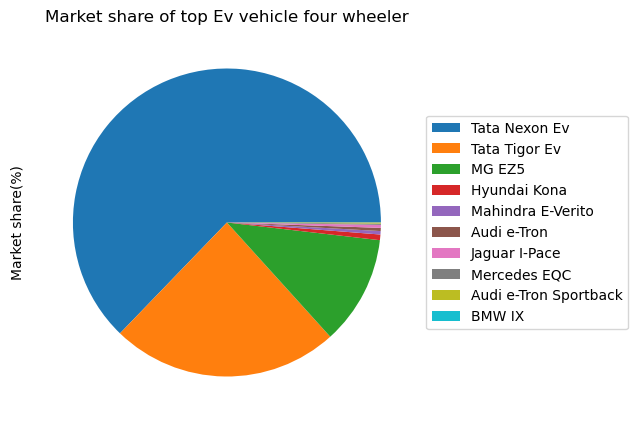

In [79]:
market_share = data['Market share(%)']

fig, ax = plt.subplots(figsize=(5, 5))
pie = market_share.plot.pie(labels=None, )

# Create custom labels for legends
custom_labels = data['Product'].tolist()

ax.legend(custom_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Market share of top Ev vehicle four wheeler')
plt.savefig('MarketShare.png', bbox_inches='tight', pad_inches=0)
plt.savefig('Share1.png', bbox_inches='tight', pad_inches=0) 
plt.show()


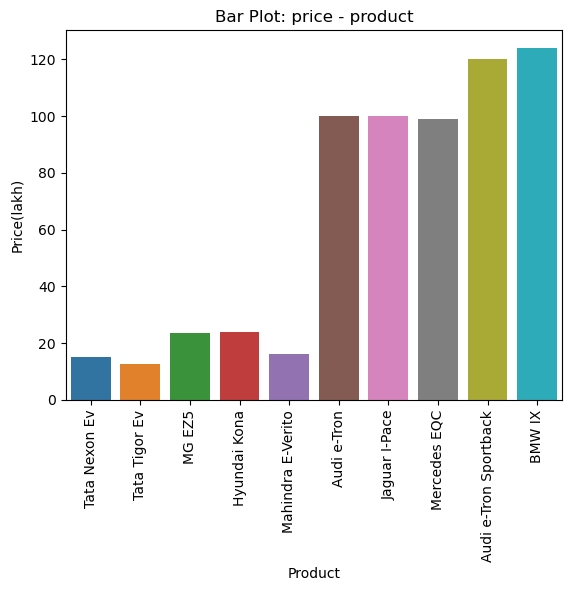

In [80]:
sns.barplot(data['Product'],data['Price(lakh)'])
plt.xticks(rotation='vertical')
plt.title('Bar Plot: price - product')
plt.savefig('price-product.png', bbox_inches='tight', pad_inches=0)
plt.show()

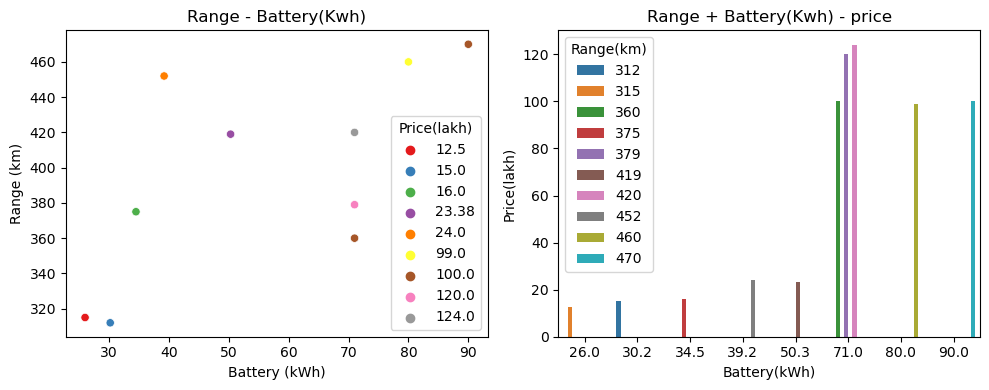

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(data['Battery(kWh)'], data['Range(km)'], hue=data['Price(lakh)'], palette='Set1',ax=axes[0])
axes[0].set_xlabel('Battery (kWh)')
axes[0].set_ylabel('Range (km)')
axes[0].set_title('Range - Battery(Kwh)')

sns.barplot(data['Battery(kWh)'],data['Price(lakh)'], hue=data['Range(km)'], ax=axes[1])
axes[1].set_ylabel('Price(lakh)')
axes[1].set_title('Range + Battery(Kwh) - price')

plt.tight_layout()
plt.savefig('Range-Battery.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [82]:
##success of Tata nexon ev is low price medium range

In [105]:
##customer behaviour anlysis

Cdata=pd.read_csv("customerBehaviuor.csv")

In [106]:
Cdata.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [107]:
Cdata['House Loan']=Cdata['House Loan'].apply(lambda x: 1 if x=="Yes" else 0)
Cdata['Personal loan']=Cdata['Personal loan'].apply(lambda x: 1 if x=="Yes" else 0)
Cdata['Wife Working']=Cdata['Wife Working'].apply(lambda x: 1 if x=="Yes" else 0)
Cdata['Profession']=Cdata['Profession'].apply(lambda x: 1 if x=="Salaried" else 0)
Cdata.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,Single,Post Graduate,0,1,0,0,800000,0,800000,i20,800000
1,35,1,Married,Post Graduate,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,Married,Graduate,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,Married,Post Graduate,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,Married,Post Graduate,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [108]:
max_salary = Cdata["Salary"].max()
Cdata["normalize_salary"] = Cdata["Salary"]/abs(max_salary )
Cdata["normalize_salary"]= Cdata["normalize_salary"].round(2)
max_price=Cdata["Price"].max()
Cdata["normalize_price"] = Cdata["Price"]/abs(max_price)
Cdata["normalize_price"]= Cdata["normalize_price"].round(2)
Cdata.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,normalize_salary,normalize_price
0,27,1,Single,Post Graduate,0,1,0,0,800000,0,800000,i20,800000,0.21,0.27
1,35,1,Married,Post Graduate,2,1,1,1,1400000,600000,2000000,Ciaz,1000000,0.37,0.33
2,45,0,Married,Graduate,4,1,1,0,1800000,0,1800000,Duster,1200000,0.47,0.40
3,41,0,Married,Post Graduate,3,0,0,1,1600000,600000,2200000,City,1200000,0.42,0.40
4,31,1,Married,Post Graduate,2,1,0,1,1800000,800000,2600000,SUV,1600000,0.47,0.53


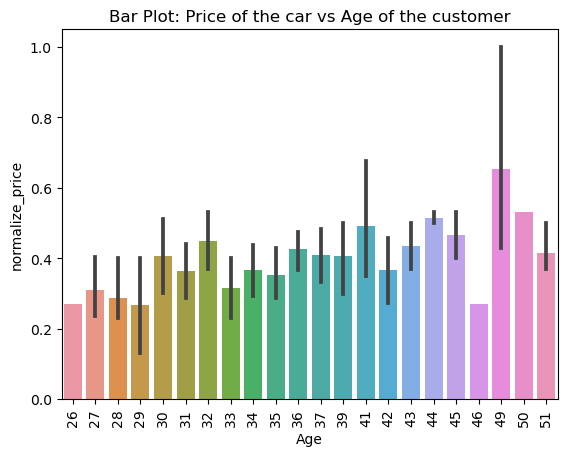

In [109]:
##realtionship with age
sns.barplot(Cdata['Age'],Cdata['normalize_price'])
plt.xticks(rotation='vertical')
plt.title('Bar Plot: Price of the car vs Age of the customer')
plt.savefig('Age-product.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [88]:
## Transform age column:
Cdata['Age-Range']=np.where(Cdata['Age']<=32, 32, np.where(Cdata['Age']<=45, 45, 51))
Cdata['Age-Range'].value_counts()

45    62
32    29
51     8
Name: Age-Range, dtype: int64

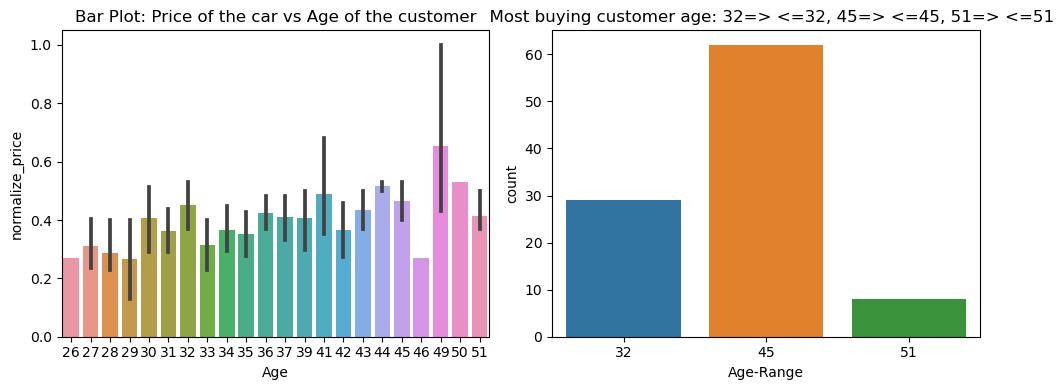

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(Cdata['Age'],Cdata['normalize_price'], ax=axes[0])
# sns.barplot(data['Battery(kWh)'], data['Range(km)'], hue=data['Price(lakh)'], palette='Set1',ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('normalize_price')
axes[0].set_title('Bar Plot: Price of the car vs Age of the customer')

sns.countplot(Cdata['Age-Range'], ax=axes[1])
axes[1].set_title('  Most buying customer age: 32=> <=32, 45=> <=45, 51=> <=51')
plt.tight_layout()
plt.savefig('age-product1.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [90]:
cols=Cdata.columns.values
cols=['Personal loan','House Loan', 'normalize_salary','normalize_price']
values = Cdata[cols].values
target=Cdata['Age-Range'].values

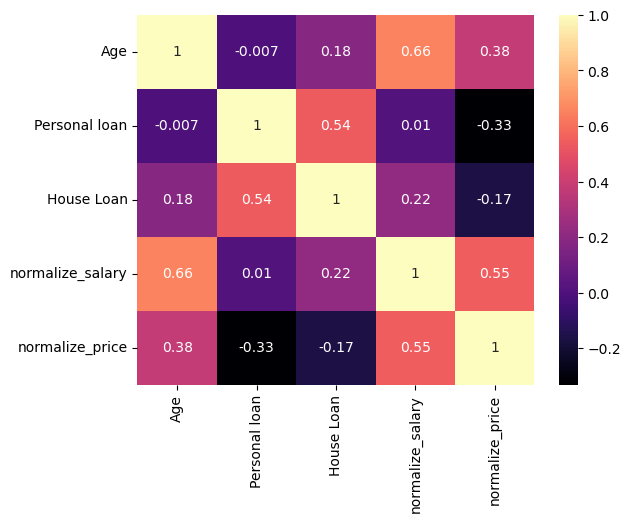

In [115]:
cor_col=['Age','Personal loan','House Loan', 'normalize_salary','normalize_price']
cor_data = Cdata[cor_col]
correlation_matrix = cor_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.savefig('cor.png', bbox_inches='tight', pad_inches=0)
plt.show()

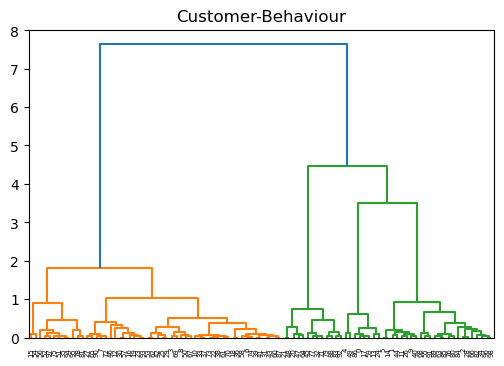

In [91]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(6, 4))
plt.title("Customer-Behaviour")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.show()

In [92]:
##2 cluster
# from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Z= cluster.fit_predict(values)

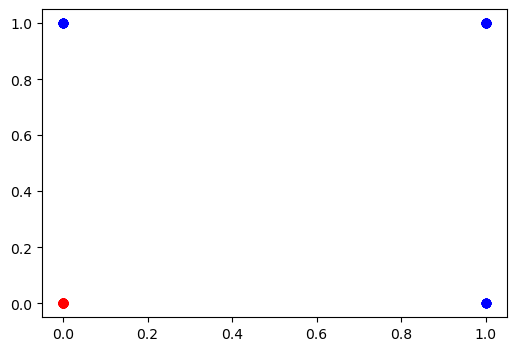

In [93]:
plt.figure(figsize=(6, 4))
plt.scatter(values[Z==0,0], values[Z==0,1], color="blue")
plt.scatter(values[Z==1,0], values[Z==1,1], color="red")
# plt.scatter(values[:,0], values[:,1], c=cluster.labels_, cmap='rainbow')

In [94]:
#Describing Segments

In [95]:
# from statsmodels.graphics.mosaicplot import mosaic
kmeans = KMeans(2, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, target)

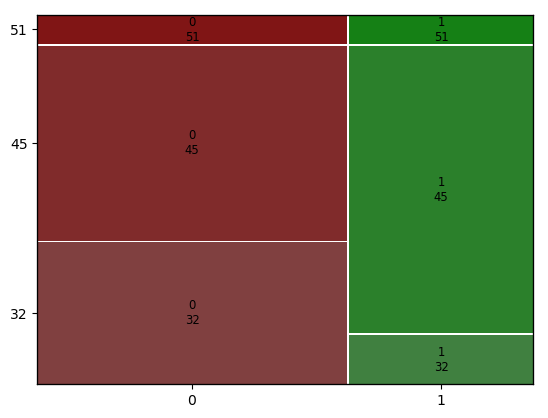

In [96]:
mosaic(crosstabLike.stack())
plt.show()

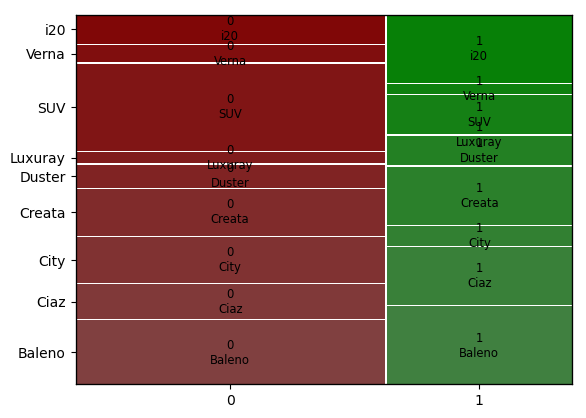

In [97]:
crosstabCondition = pd.crosstab(kmeans.labels_, Cdata['Make'])
mosaic(crosstabCondition.stack())
plt.show()

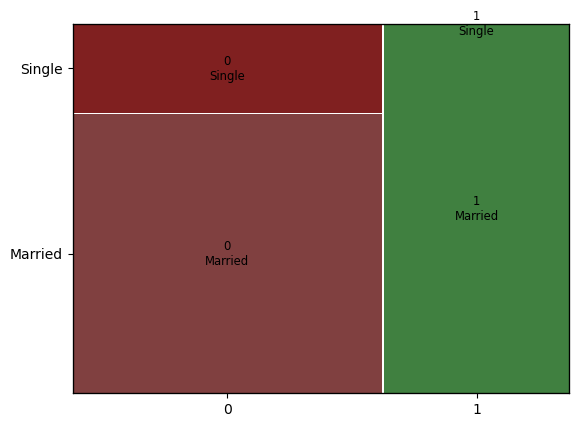

In [98]:
crosstabDriven = pd.crosstab(kmeans.labels_, Cdata['Marrital Status'])
mosaic(crosstabDriven.stack())
plt.show()

In [99]:
#Selecting the Target Segments

<Figure size 640x480 with 0 Axes>

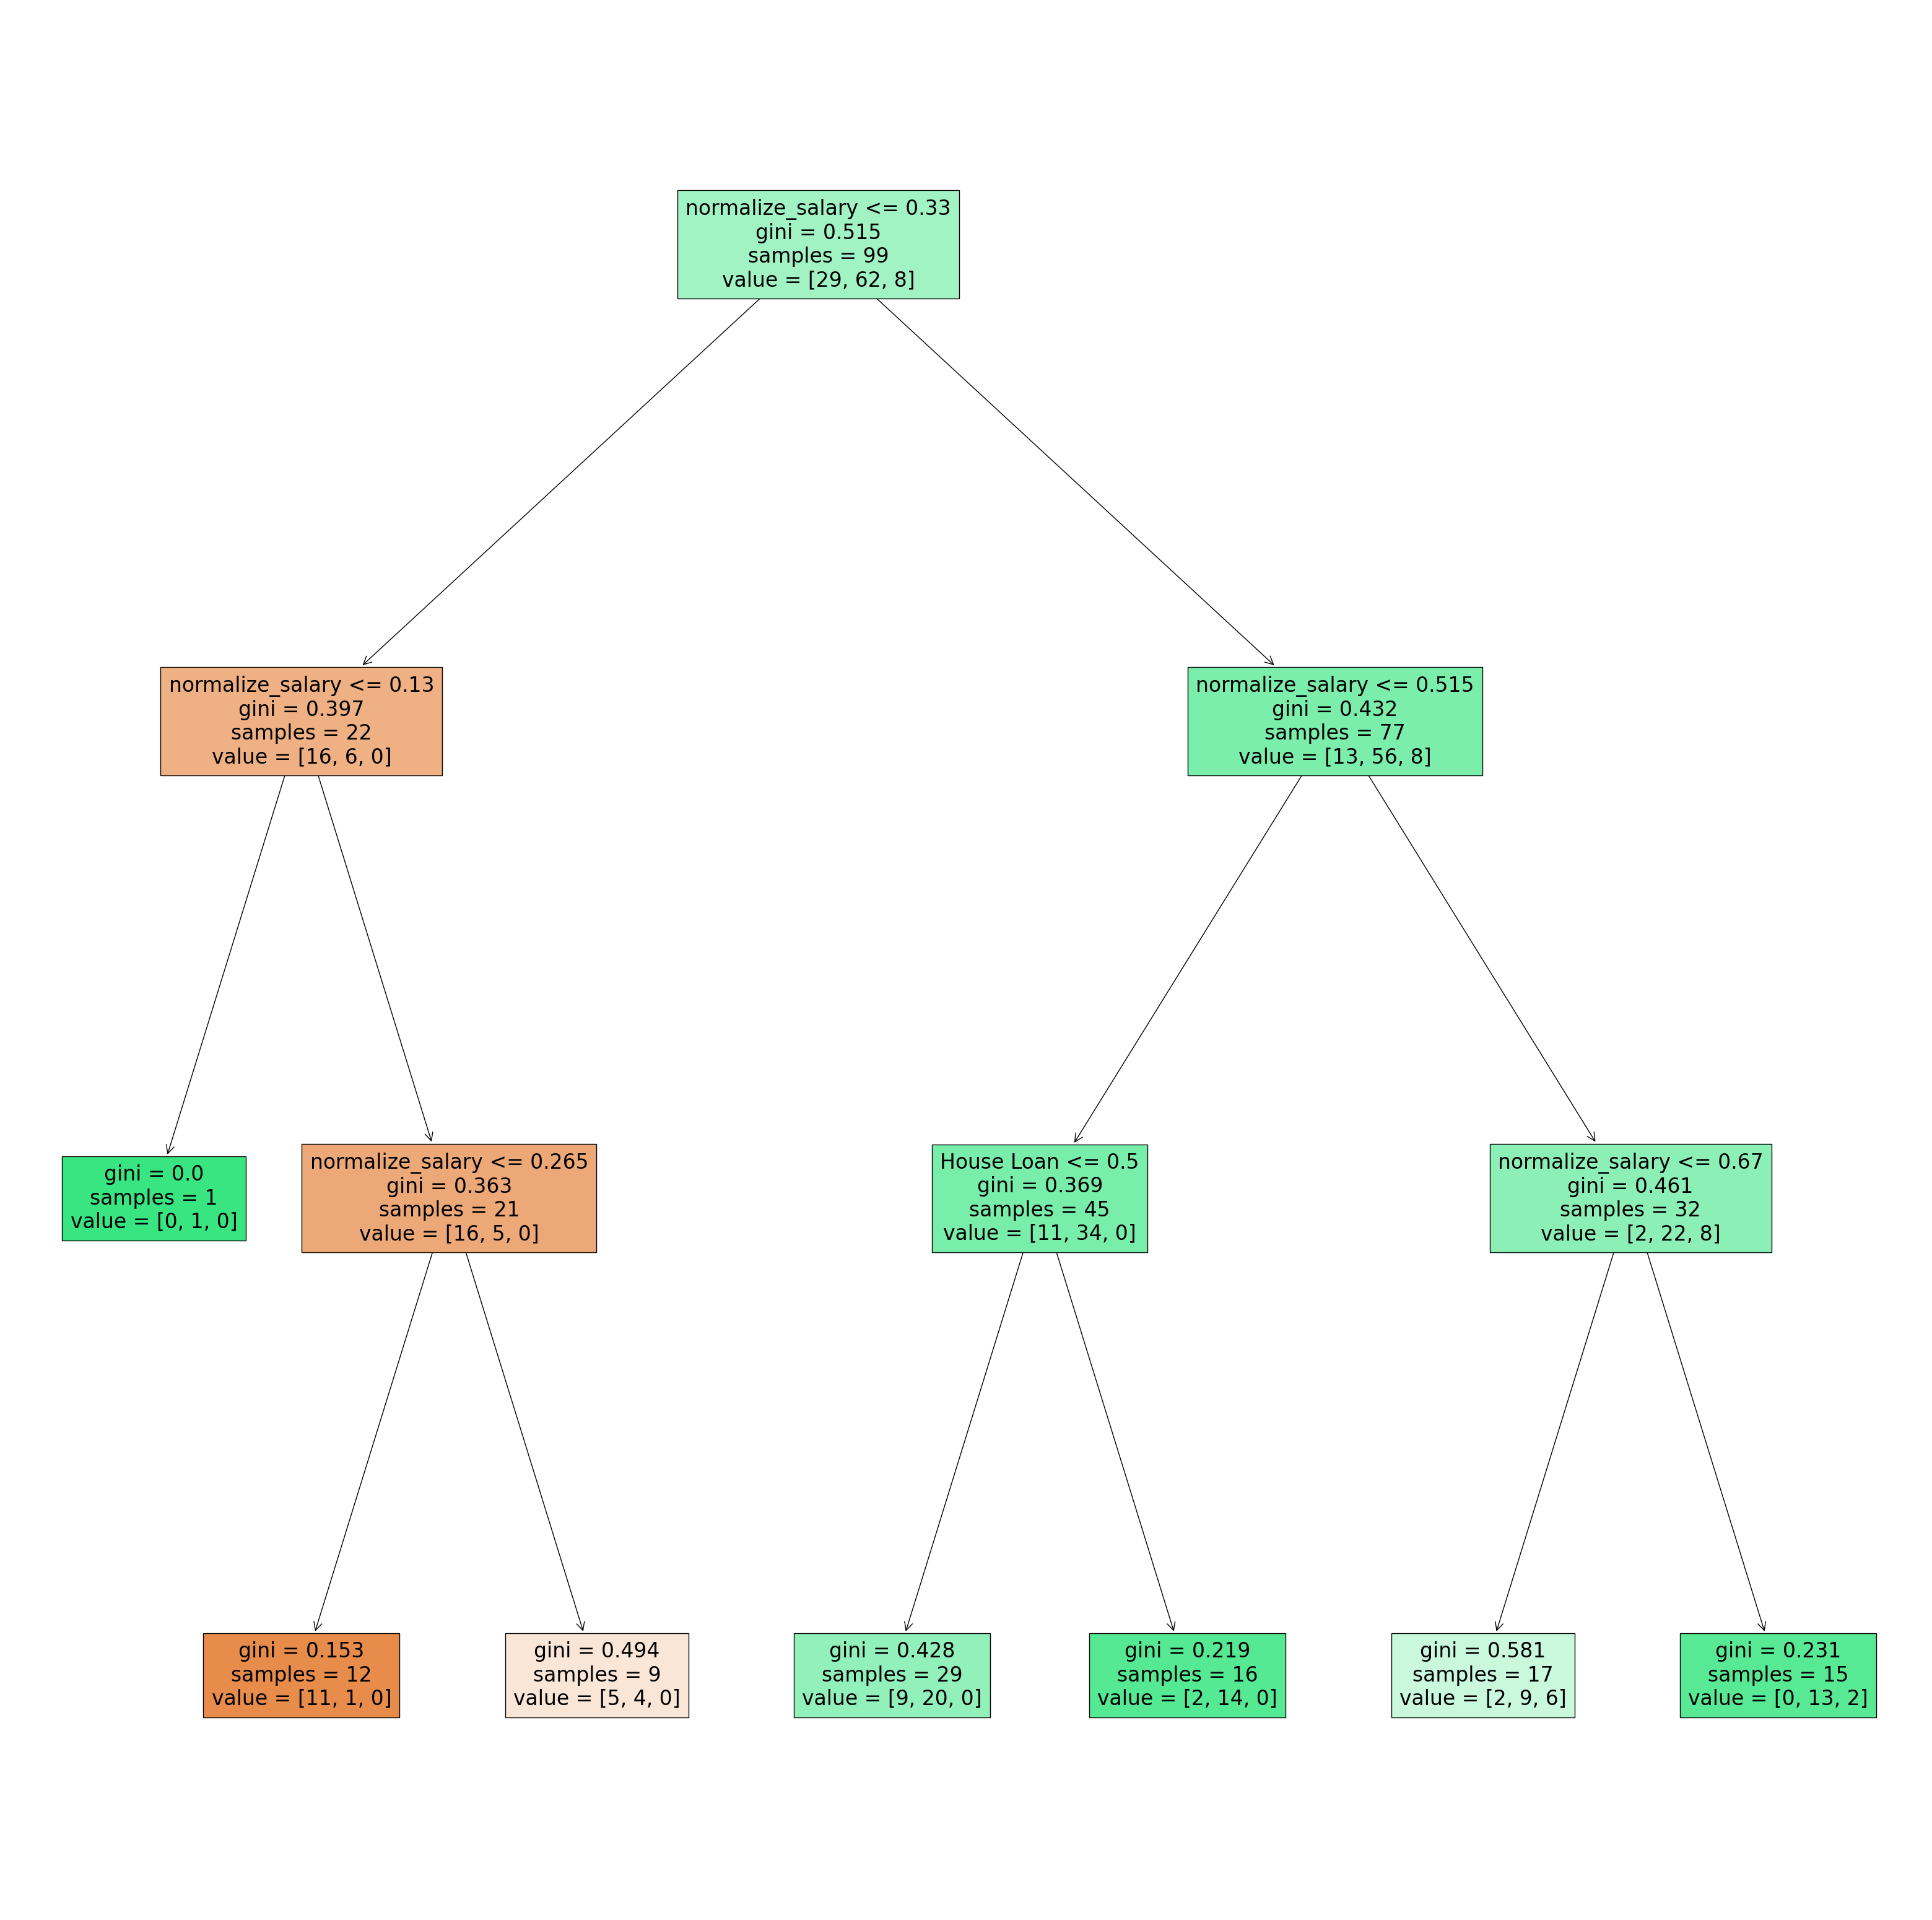

In [116]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(values, target)

plt.savefig('tree.png', bbox_inches='tight', pad_inches=0)

fig = plt.figure(figsize=(40,40))
_ = plot_tree(dtree, 
                   feature_names=cols,  
                   filled=True)

In [3]:
##battery dataset
battery = pd.read_csv('battery.csv')

In [4]:
battery.head()

,produc Info,standard Qty,Country of Origin,Country of destination
0,"BATERIA,INCELL,SP48-33-100S-SC,|BATERIA DE LIT...",2,Mexico,Peru
1,House Battery EV BATTERY,110,Turkey,Sudan
2,"24V 230 AH Lithium Eve Energy , 48V 100 AH LF...",2,Turkey,Turkey
3,BMZ BATTERY 168S01P EV 618V 94AH 58KWH (SER...,1,Poland,Turkey
4,BATTERY >> LITHIUM-ION BATTERY EV MODULE 4878-...,12,China,India


In [11]:
#total battery import from others country
indiaOrigin= battery[battery['Country of destination']=='India']
battery[battery['Country of destination']=='India']['standard Qty'].sum()

1293544

,produc Info,standard Qty,Country of Origin,Country of destination
4,BATTERY >> LITHIUM-ION BATTERY EV MODULE 4878-...,12,China,India
5,BATTERY >> LITHIUM BATTERY LI ION AUTOMOTIVE B...,125000,China,India
6,BATTERY >> LITHIUM ION BATTERY PACK FOR EV 10S...,12,China,India
7,BATTERY >> BATTERY SM-A505 FOR SAMSUNG MOB...,20,South Korea,India
8,BATTERY >> EV BATTERY PACK P049 LI-ION -,8,China,India


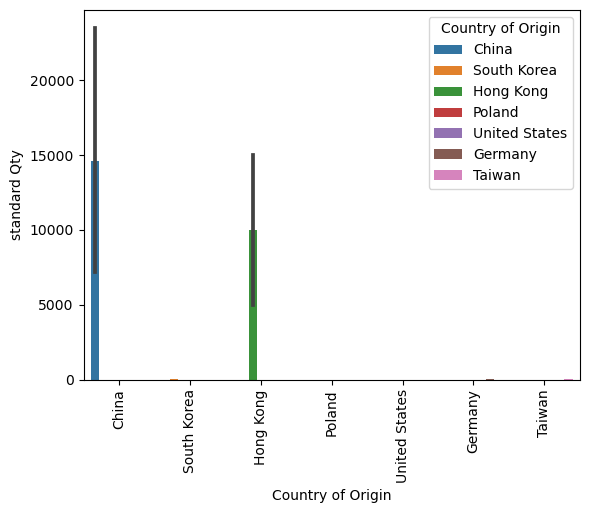

In [43]:
sns.barplot(indiaOrigin['Country of Origin'],indiaOrigin['standard Qty'], hue=indiaOrigin['Country of Origin'])
plt.xticks(rotation='vertical')
plt.savefig('battrtbar.png', bbox_inches='tight', pad_inches=0)
plt.show()

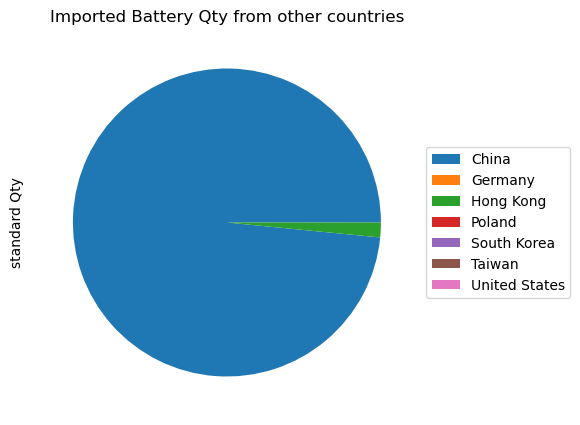

In [42]:
market_share = gdata['standard Qty']

fig, ax = plt.subplots(figsize=(5, 5))
pie = market_share.plot.pie(labels=None, )

# Create custom labels for legends
custom_labels = gdata['Country of Origin'].tolist()

ax.legend(custom_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Imported Battery Qty from other countries')
plt.savefig('Batterypie.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [30]:
gdata=indiaOrigin.groupby('Country of Origin').sum().reset_index()

In [32]:
gdata

,Country of Origin,standard Qty
0,China,1273493
1,Germany,8
2,Hong Kong,20000
3,Poland,1
4,South Korea,20
5,Taiwan,20
6,United States,2


In [ ]:
## India imports most of its Ev battery and HSN Code 85076000 from China, United Kingdom and Vietnam and is the largest importer of Ev battery and HSN Code 85076000 in the World
##The below graph represnts the battery import information data of india.
## For the existing Ev company main challange is to reduce the cost of product and this cost is highly dependent on battries.
##For reducing the cost of the product battries cost should be less, for it dependencies for battrey would be less in this case.
## another major market challanges is india has not enough charging station.